In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statistics as st

In [2]:
df = pd.read_csv('data/diamonds_train.csv')

df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95
...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43
40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73
40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01
40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76


In [3]:
data_1 = df.groupby(['color','clarity','cut'])

data_1.first()

carat  depth  table  price     x     y     z
color clarity cut                                                    
D     I1      Fair        0.91   66.2   57.0   2491  6.00  5.94  3.95
              Good        1.20   63.6   60.0   4346  6.72  6.67  4.26
              Ideal       2.75   60.9   57.0  13156  9.04  8.98  5.49
              Premium     1.16   61.8   59.0   3711  6.78  6.74  4.18
              Very Good   1.01   63.4   61.0   2291  6.38  6.30  4.02
...                        ...    ...    ...    ...   ...   ...   ...
J     VVS1    Very Good   0.72   61.4   61.0   2093  5.70  5.77  3.52
      VVS2    Good        1.50   63.3   57.0   8276  7.25  7.28  4.60
              Ideal       0.71   60.3   61.0   2226  5.76  5.79  3.48
              Premium     1.00   59.6   61.0   3864  6.40  6.36  3.80
              Very Good   2.00   63.0   59.0  15076  7.97  8.00  5.03

[273 rows x 7 columns]

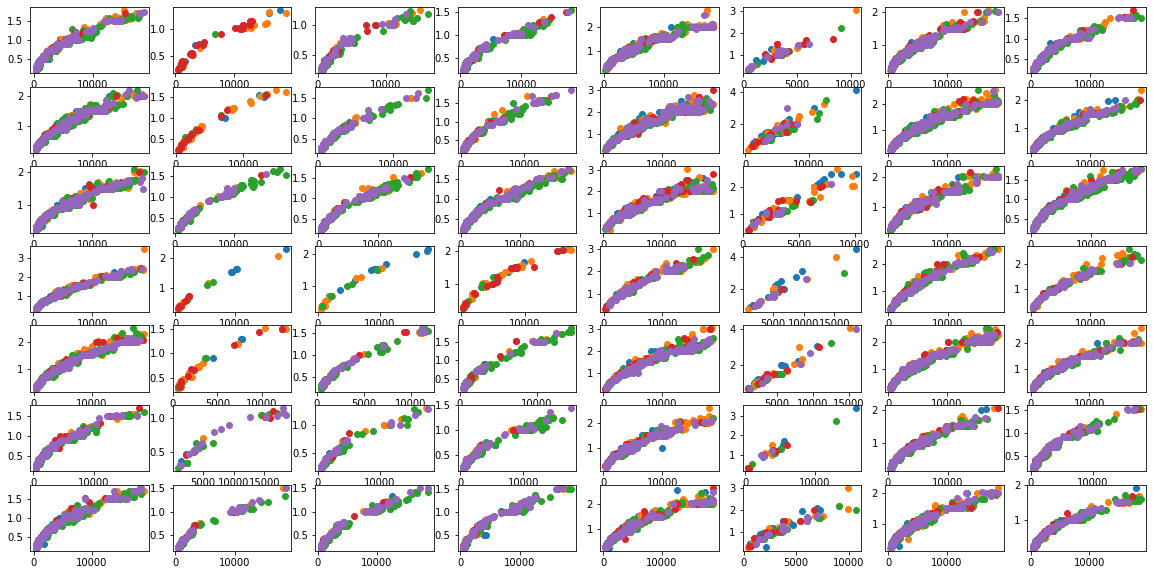

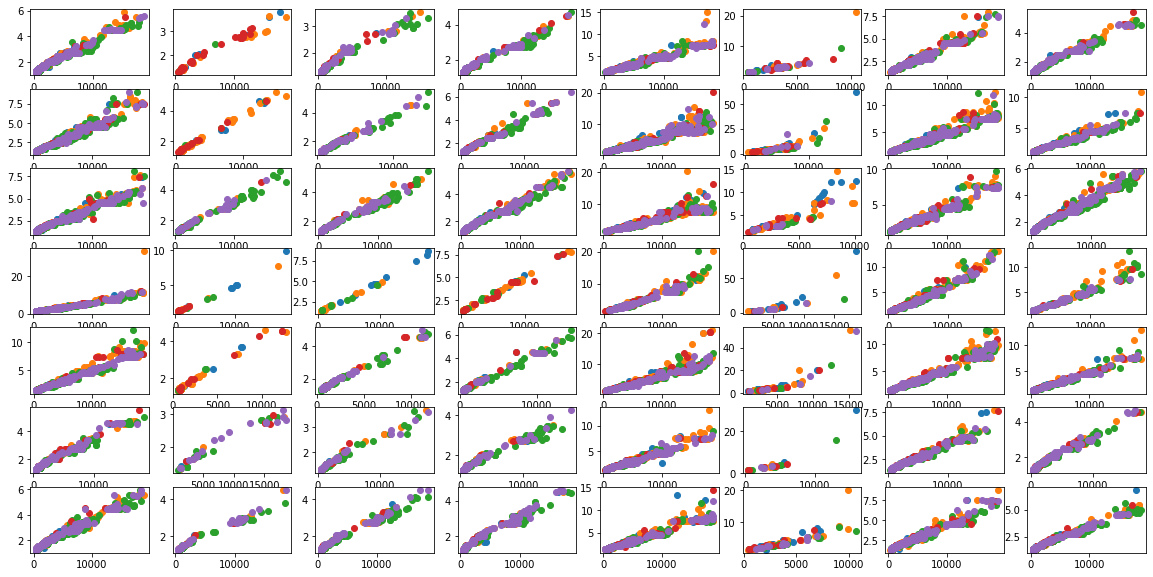

In [4]:
lst_cut = list(set(df['cut']))

lst_color = list(set(df['color']))

lst_clarity = list(set(df['clarity']))

#Normal

fig, axes = plt.subplots(ncols = len(lst_clarity),nrows=len(lst_color), figsize=(20, 10))
for k in range(len(lst_color)):
    for j in range(len(lst_clarity)):
        for i in lst_cut:
            try:
                x = list(data_1.get_group((lst_color[k],lst_clarity[j],i))['price'])
                y = list(data_1.get_group((lst_color[k],lst_clarity[j],i))['carat'])
                axes[k][j].scatter(x,y)
            except KeyError:
                pass
            
#Exponential

fig, axes = plt.subplots(ncols = len(lst_clarity),nrows=len(lst_color), figsize=(20, 10))
for k in range(len(lst_color)):
    for j in range(len(lst_clarity)):
        for i in lst_cut:
            try:
                x = list(data_1.get_group((lst_color[k],lst_clarity[j],i))['price'])
                y = list(np.exp(data_1.get_group((lst_color[k],lst_clarity[j],i))['carat']))
                axes[k][j].scatter(x,y)
            except KeyError:
                pass

In [6]:
lst_1 = [[[] for j in range(len(lst_clarity))] for k in range(len(lst_color))]

lst_2 = [[[] for j in range(len(lst_clarity))] for k in range(len(lst_color))]

for k in range(len(lst_color)):
    for j in range(len(lst_clarity)):
        for i in lst_cut:
            try:
                x = list(data_1.get_group((lst_color[k],lst_clarity[j],i))['price'])
                y = list(np.exp(data_1.get_group((lst_color[k],lst_clarity[j],i))['carat']))
                lst_1[k][j].append(stats.linregress(x,y).rvalue)
                lst_2[k][j].append(stats.linregress(x,y).slope)
            except KeyError:
                pass

In [7]:
df_2 = pd.DataFrame(lst_1, columns=lst_clarity, index=lst_color)

df_2

,VS2,IF,VVS1,VVS2,SI2,I1,SI1,VS1
E,"[0.9827579101036337, 0.9897078204080701, 0.986...","[0.9921556370239215, 0.991757536072533, 0.9991...","[0.999397552288675, 0.9854493681570188, 0.9864...","[0.9943469710494904, 0.9903930379123852, 0.989...","[0.9635554055093336, 0.9582641226396039, 0.975...","[0.8744141680174675, 0.8904798959132595, 0.943...","[0.9714043149349514, 0.9827244962252918, 0.986...","[0.937913166444072, 0.9932043546830867, 0.9866..."
H,"[0.9709286591918224, 0.9826212236080213, 0.971...","[0.9947364129003632, 0.9964903203671095, 0.998...","[0.0, 0.994612160523256, 0.9903870356041836, 0...","[0.9975750255033907, 0.9866091555922512, 0.991...","[0.9445314596819162, 0.9415201175251674, 0.964...","[0.8704316003578223, 0.9296222565310127, 0.801...","[0.988648395645026, 0.9675849625777496, 0.9739...","[0.9636109754573291, 0.9763818019516703, 0.991..."
G,"[0.988492061222546, 0.9894033677671412, 0.9828...","[1.0, 0.9957655811647746, 0.9931011831103042, ...","[0.9967326348874127, 0.9874906428033248, 0.993...","[0.9899687641186126, 0.9943988895412552, 0.992...","[0.9534407337600613, 0.9303728552628499, 0.960...","[0.98320114161587, 0.8848572639740475, 0.97803...","[0.965765455304208, 0.9820887881302249, 0.9794...","[0.978563668128387, 0.9911334128472432, 0.9901..."
J,"[0.9787361634838481, 0.8518919883041342, 0.986...","[0.9869555047342903, 0.9996552422310158, 0.998...","[0.9974210281187539, 0.9978057839641048, 0.996...","[0.9956666713191971, 0.997472841453522, 0.9970...","[0.9920865964763625, 0.9574677145642958, 0.945...","[0.9160579740922953, 0.9054993092680093, 1.0, ...","[0.9812946501879906, 0.9785936980647466, 0.971...","[0.9932762594943806, 0.9742641199008935, 0.971..."
I,"[0.9962128603131812, 0.9822633356511694, 0.969...","[0.9975468252022953, 0.9919679246357013, 0.999...","[0.0, 0.9973191558577201, 0.9951708595049809, ...","[0.9978381019424443, 0.9966018176137615, 0.994...","[0.9398527524780671, 0.9079835670208906, 0.969...","[0.8932999317052651, 0.8562224677650737, 0.944...","[0.9894239345953901, 0.9754267067874046, 0.976...","[0.9773672191491979, 0.9680848220142771, 0.987..."
D,"[0.9884261924282135, 0.9923594906519673, 0.987...","[0.9845570247351445, 0.9869982714072184, 0.987...","[0.994109433132329, 0.9917503040997173, 0.9839...","[0.9656553846129969, 0.9864646199386127, 0.989...","[0.9417686624510092, 0.9658490887838028, 0.982...","[0.9877750220167237, 0.5375897750861236, 0.947...","[0.9853777460454546, 0.9870963624061041, 0.990...","[0.9818534361662624, 0.9890880673588419, 0.988..."
F,"[0.970959788284228, 0.994211073642466, 0.99065...","[1.0, 0.9871070891670721, 0.9929628727868934, ...","[0.9999002564907588, 0.9877642900012232, 0.990...","[0.9806571073181866, 0.9882104732965722, 0.990...","[0.927413262767478, 0.9697657224873302, 0.9745...","[0.9603889557219218, 0.8140370131447802, 0.961...","[0.9625715700788072, 0.9835480894742669, 0.990...","[0.9839461240879084, 0.9926908989461258, 0.989..."


In [8]:
df_3 = pd.DataFrame(lst_2, columns=lst_clarity, index=lst_color)

df_3

,VS2,IF,VVS1,VVS2,SI2,I1,SI1,VS1
E,"[0.0002638868745142036, 0.00023653236568824522...","[0.00014458330948707694, 0.0001260579370107602...","[0.00017649893789022341, 0.0001487565601988740...","[0.0002054904599472507, 0.00017620594996481934...","[0.0004223642765431533, 0.0004169199190910079,...","[0.0010732593367975705, 0.0018759281733301363,...","[0.0003268238191763489, 0.0002976621542819508,...","[0.00022477065876933222, 0.0002020588880683901..."
H,"[0.00037817479486814575, 0.0003441400268550918...","[0.0002641291785238595, 0.00025885012476227135...","[nan, 0.00028013820086551685, 0.00025495952866...","[0.0003702090047229567, 0.0002996826770304624,...","[0.0006199852438680653, 0.0005311569033459839,...","[0.0027421217598740063, 0.0016672638914685257,...","[0.00042423271942341974, 0.0004015911361780595...","[0.0004002595007723139, 0.0003320005678089137,..."
G,"[0.00032819148939482623, 0.0002712866840370396...","[0.0002839984152579553, 0.00019518344261193374...","[0.00031231820992273204, 0.0002160349118958281...","[0.00024071340750537044, 0.0002270981767586742...","[0.0005806940776060969, 0.0004558256277099704,...","[0.0012183695673959553, 0.0009590975324745584,...","[0.00038034364927525964, 0.0003545327585780259...","[0.0002450820462759651, 0.0002499879522022713,..."
J,"[0.000552199253543968, 0.0005980070073602808, ...","[0.0004418361630119838, 0.0003754074455508814,...","[0.00040387402515446817, 0.00034707064810214, ...","[0.00039567614285718677, 0.0003815331551752002...","[0.0007145444035370471, 0.0006518904082166448,...","[0.004580473316894852, 0.003320893893612316, 0...","[0.0006179562344435387, 0.0005767998179874123,...","[0.0004393760543700758, 0.0004913034370880586,..."
I,"[0.000376096086784834, 0.00039991747680663504,...","[0.0003260094331527833, 0.0002871051381974727,...","[nan, 0.00030481905409892, 0.00030107597169994...","[0.0004886290840587699, 0.00033131045552958494...","[0.000952149962515289, 0.0006062578803238679, ...","[0.0014086982397150112, 0.00293111495758366, 0...","[0.00041030220782806116, 0.0004561920643826435...","[0.0004364493160219593, 0.0003871730162557205,..."
D,"[0.00023943550812943084, 0.0002178756915924415...","[0.00023634846108184094, 9.269968912861675e-05...","[0.0001291649888359245, 0.00013608377662730164...","[0.00014098346536538025, 0.0001453069764464167...","[0.00040629413107345745, 0.0003985529607126479...","[0.0021716728262334427, 0.0007460903457342674,...","[0.00036967891523280363, 0.0002907828330368957...","[0.00020915833141675852, 0.0001883073718989020..."
F,"[0.00024253134891630962, 0.0002374512426838039...","[0.00028752164982021874, 0.0001644955658107621...","[0.0001994582965272079, 0.00016745937413359299...","[0.00020167711168928354, 0.0001798010263770461...","[0.0005772884681620743, 0.00041698771256757885...","[0.000918343032907743, 0.001104415120341657, 0...","[0.0003607753898704825, 0.00031437325445491065...","[0.0002961699893022258, 0.0002157566701102425,..."


In [9]:

def Average(lst): 
    return sum(lst) / len(lst) 


lst_1_new = [[] for k in range(len(lst_color))]
for i in range(len(lst_1)):
    for j in lst_1[i]:
        lst_1_new[i].append(Average(j))
        
lst_1_new 

[[0.9881028938675961,
  0.9937622293152174,
  0.9860909512665108,
  0.9911799479845678,
  0.9733924257974118,
  0.8973445344319085,
  0.9827970419881948,
  0.9797648493161235],
 [0.9797432561249588,
  0.9972419230509694,
  0.7932084411798391,
  0.9925118566167352,
  0.9419582614553391,
  0.8275833586036232,
  0.9776194121231978,
  0.9824055722950031],
 [0.9856330165480178,
  0.995532612468877,
  0.9924255982859247,
  0.9901683595494184,
  0.9531548491511395,
  0.9474191845509783,
  0.9794183868648695,
  0.988027910579665],
 [0.9576043230232625,
  0.9910157809483738,
  0.9971692302039467,
  0.9943573084114501,
  0.9702926710726553,
  0.9594956612750349,
  0.9801915020772644,
  0.9848944958205974],
 [0.9842124823929753,
  0.9959185788794275,
  0.7973756493483958,
  0.994295208991459,
  0.9409159673298919,
  0.9080180582817553,
  0.9827120467790662,
  0.9844499929726231],
 [0.9898452392852823,
  0.9848455759469171,
  0.9891398079305386,
  0.982923339002763,
  0.9722885621029942,
  0.86970

In [10]:
df_2_new = pd.DataFrame(lst_1_new, columns=lst_clarity, index=lst_color)

df_2_new

,VS2,IF,VVS1,VVS2,SI2,I1,SI1,VS1
E,0.988103,0.993762,0.986091,0.991180,0.973392,0.897345,0.982797,0.979765
H,0.979743,0.997242,0.793208,0.992512,0.941958,0.827583,0.977619,0.982406
G,0.985633,0.995533,0.992426,0.990168,0.953155,0.947419,0.979418,0.988028
J,0.957604,0.991016,0.997169,0.994357,0.970293,0.959496,0.980192,0.984894
I,0.984212,0.995919,0.797376,0.994295,0.940916,0.908018,0.982712,0.984450
D,0.989845,0.984846,0.989140,0.982923,0.972289,0.869706,0.988677,0.987853
F,0.985885,0.991775,0.991611,0.985060,0.961499,0.930666,0.982029,0.987791


In [11]:
lst_2_new = [[] for k in range(len(lst_color))]
for i in range(len(lst_2)):
    for j in lst_2[i]:
        lst_2_new[i].append(Average(j))
        
lst_2_new 

[[0.0002387769438593421,
  0.00014936386991454823,
  0.00015662967596909372,
  0.00018212892845655119,
  0.0003927514723811174,
  0.0009718030432956465,
  0.00030303770405748325,
  0.00020855648724645628],
 [0.00034477910406476427,
  0.00025709314056005807,
  nan,
  0.00030465694346997336,
  0.0005477523313154452,
  0.0017917413316809415,
  0.00039466101267996475,
  0.0003313597405850472],
 [0.00028009025640653103,
  0.00022174386956822796,
  0.00023058530784863867,
  0.0002259922101934165,
  0.0005046838462616349,
  0.0009019960696190129,
  0.0003505539150197649,
  0.0002468026424072254],
 [0.0005356314788380032,
  0.0003874198527913014,
  0.00036243867244302826,
  0.000391222936285971,
  0.0006812469790362587,
  0.0023119739201690297,
  0.000568967505261762,
  0.00045118261837612196],
 [0.00039361834451570414,
  0.00031314282641723703,
  nan,
  0.00038018562619427683,
  0.0006693459357840147,
  0.002326566953334584,
  0.0004374436261871133,
  0.0003799014994540906],
 [0.0002261158960

In [12]:
df_3_new = pd.DataFrame(lst_2_new, columns=lst_clarity, index=lst_color)

df_3_new # Revisar doc 3

,VS2,IF,VVS1,VVS2,SI2,I1,SI1,VS1
E,0.000239,0.000149,0.000157,0.000182,0.000393,0.000972,0.000303,0.000209
H,0.000345,0.000257,NaN,0.000305,0.000548,0.001792,0.000395,0.000331
G,0.000280,0.000222,0.000231,0.000226,0.000505,0.000902,0.000351,0.000247
J,0.000536,0.000387,0.000362,0.000391,0.000681,0.002312,0.000569,0.000451
I,0.000394,0.000313,NaN,0.000380,0.000669,0.002327,0.000437,0.000380
D,0.000226,0.000122,0.000148,0.000154,0.000385,0.000981,0.000302,0.000195
F,0.000240,0.000181,0.000177,0.000189,0.000445,0.000830,0.000319,0.000234


In [13]:
# Doc.4
# Una vez mas

data= df.groupby(['color','clarity','cut'])

data.first()

carat  depth  table  price     x     y     z
color clarity cut                                                    
D     I1      Fair        0.91   66.2   57.0   2491  6.00  5.94  3.95
              Good        1.20   63.6   60.0   4346  6.72  6.67  4.26
              Ideal       2.75   60.9   57.0  13156  9.04  8.98  5.49
              Premium     1.16   61.8   59.0   3711  6.78  6.74  4.18
              Very Good   1.01   63.4   61.0   2291  6.38  6.30  4.02
...                        ...    ...    ...    ...   ...   ...   ...
J     VVS1    Very Good   0.72   61.4   61.0   2093  5.70  5.77  3.52
      VVS2    Good        1.50   63.3   57.0   8276  7.25  7.28  4.60
              Ideal       0.71   60.3   61.0   2226  5.76  5.79  3.48
              Premium     1.00   59.6   61.0   3864  6.40  6.36  3.80
              Very Good   2.00   63.0   59.0  15076  7.97  8.00  5.03

[273 rows x 7 columns]

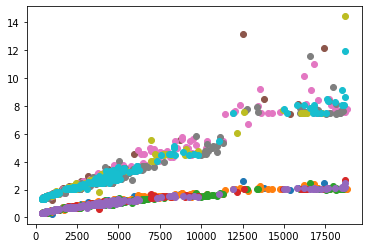

In [14]:
lst_cut = list(set(df['cut']))

for i in lst_cut:
    try:
        x = list(data.get_group(('F','SI2',i))['price'])
        y = list(data.get_group(('F','SI2',i))['carat'])
        plt.scatter(x,y)
    except KeyError:
        pass
            
        
for i in lst_cut:
    try:
        x = list(data.get_group(('F','SI2',i))['price'])
        y = list(np.exp(data.get_group(('F','SI2',i))['carat']))
        plt.scatter(x,y)
    except KeyError:
        pass
              

In [15]:
lst_lst = [[] for k in range(len(lst_cut))]


        
        
for i in range(len(lst_cut)):
    try:
        x = (list(data.get_group(('F','SI2',lst_cut[i]))['carat']))
        for j in x:
            lst_lst[i].append(j)    
    except KeyError:
        pass 
    
#index = list(data.get_group(('F','SI2',i))['price'])  

In [16]:
new_lst = np.array(lst_lst).T.tolist()

/home/josue/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [17]:
pd.DataFrame(new_lst)

,0,1,2,3,4,5,6,7,8,9,...,378,379,380,381,382,383,384,385,386,387
0,0.91,1.22,1.21,1.00,1.00,1.01,0.71,2.58,0.73,2.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.02,0.70,0.51,0.73,1.01,0.78,1.90,0.90,0.51,1.22,...,0.72,0.3,1.0,0.71,1.08,1.0,2.02,0.8,1.0,1.07
2,1.52,1.00,2.01,1.03,0.76,0.72,0.91,1.02,2.24,0.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.52,1.15,0.90,1.02,0.61,0.70,0.90,1.00,1.01,1.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.15,0.30,1.30,0.92,1.04,0.73,1.01,1.01,1.02,0.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
scatter = pd.DataFrame(lst_lst ,  index = lst_cut).T

scatter

,Fair,Premium,Ideal,Good,Very Good
0,0.91,1.02,1.52,0.52,1.15
1,1.22,0.70,1.00,1.15,0.30
2,1.21,0.51,2.01,0.90,1.30
3,1.00,0.73,1.03,1.02,0.92
4,1.00,1.01,0.76,0.61,1.04
...,...,...,...,...,...
383,NaN,1.00,NaN,NaN,NaN
384,NaN,2.02,NaN,NaN,NaN
385,NaN,0.80,NaN,NaN,NaN
386,NaN,1.00,NaN,NaN,NaN


In [19]:
lst_lst_2 = [[] for k in range(len(lst_cut))]


        
        
for i in range(len(lst_cut)):
    try:
        x = (np.exp(list(data.get_group(('F','SI2',lst_cut[i]))['carat'])))
        for j in x:
            lst_lst_2[i].append(j)    
    except KeyError:
        pass 

In [20]:
scatter_exp = pd.DataFrame(lst_lst_2 ,  index = lst_cut).T

scatter_exp

,Fair,Premium,Ideal,Good,Very Good
0,2.484323,2.773195,4.572225,1.682028,3.158193
1,3.387188,2.013753,2.718282,3.158193,1.349859
2,3.353485,1.665291,7.463317,2.459603,3.669297
3,2.718282,2.075081,2.801066,2.773195,2.509290
4,2.718282,2.745601,2.138276,1.840431,2.829217
...,...,...,...,...,...
383,NaN,2.718282,NaN,NaN,NaN
384,NaN,7.538325,NaN,NaN,NaN
385,NaN,2.225541,NaN,NaN,NaN
386,NaN,2.718282,NaN,NaN,NaN


In [21]:
scatter.to_csv('data/scatter.csv', index=True, header=True)

scatter_exp.to_csv('data/scatter_exp.csv', index=True, header=True)

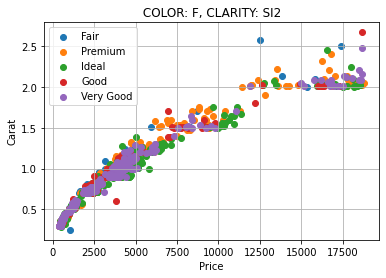

In [22]:
lst_cut = list(set(df['cut']))

for i in lst_cut:
    try:
        x = list(data.get_group(('F','SI2',i))['price'])
        y = list(data.get_group(('F','SI2',i))['carat'])
        plt.scatter(x,y,label=i)
        plt.legend()
        plt.title(' COLOR: F, CLARITY: SI2 ')
        plt.xlabel('Price')
        plt.ylabel('Carat')
        plt.grid()
        plt.savefig('data/Scatter_plot.pdf')
    except KeyError:
        pass

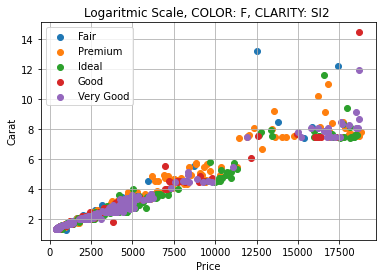

In [23]:
for i in lst_cut:
    try:
        x = list(data.get_group(('F','SI2',i))['price'])
        y = list(np.exp(data.get_group(('F','SI2',i))['carat']))
        plt.scatter(x,y,label=i)
        plt.legend()
        plt.title('Logaritmic Scale, COLOR: F, CLARITY: SI2 ')
        plt.xlabel('Price')
        plt.ylabel('Carat')
        plt.grid()
        plt.savefig('data/Log_2Scatter_plot.pdf')
    except KeyError:
        pass

In [24]:
# Doc. 5

df_1 = pd.read_csv('data/correlation_new.csv')

df_2 = pd.read_csv('data/correlation_new_ajust.csv')

In [25]:
df_1

,Unnamed: 0,VS1,SI1,IF,I1,VVS1,VVS2,VS2,SI2
0,I,0.984450,0.982712,0.995919,0.908018,0.797376,0.994295,0.984212,0.940916
1,H,0.982406,0.977619,0.997242,0.827583,0.793208,0.992512,0.979743,0.941958
2,J,0.984894,0.980192,0.991016,0.959496,0.997169,0.994357,0.957604,0.970293
3,E,0.979765,0.982797,0.993762,0.897345,0.986091,0.991180,0.988103,0.973392
4,D,0.987853,0.988677,0.984846,0.869706,0.989140,0.982923,0.989845,0.972289
5,F,0.987791,0.982029,0.991775,0.930666,0.991611,0.985060,0.985885,0.961499
6,G,0.988028,0.979418,0.995533,0.947419,0.992426,0.990168,0.985633,0.953155


In [26]:
df_2

,Unnamed: 0,VS1,SI1,IF,I1,VVS1,VVS2,VS2,SI2
0,E,0.971546,0.981455,0.992716,0.903525,0.986678,0.991801,0.988301,0.972716
1,H,0.979666,0.975415,0.996072,0.827583,0.793093,0.990964,0.976897,0.940694
2,J,0.983314,0.979475,0.990793,0.959496,0.997133,0.993842,0.955595,0.970163
3,I,0.981703,0.981054,0.995866,0.908018,0.797462,0.993767,0.982629,0.939714
4,D,0.990318,0.987590,0.988530,0.866298,0.987199,0.984920,0.990404,0.970376
5,F,0.987735,0.981324,0.990357,0.930287,0.991991,0.983693,0.986437,0.960874
6,G,0.986643,0.978274,0.995070,0.947419,0.992650,0.988074,0.983541,0.951554


In [27]:
V_1 = list(df_1['VS1']) + list(df_1['SI1']) + list(df_1['IF']) + list(df_1['I1']) + list(df_1['VVS1']) + list(df_1['VVS2']) + list(df_1['VS2']) + list(df_1['SI2'])



In [28]:
V_2 = list(df_2['VS1']) + list(df_2['SI1']) + list(df_2['IF']) + list(df_2['I1']) + list(df_2['VVS1']) + list(df_2['VVS2']) + list(df_2['VS2']) + list(df_2['SI2'])

In [31]:
st.stdev(V_1)

0.046201104319247246

In [32]:
st.stdev(V_2)

0.04601031211358402

In [33]:
d1 = pd.read_csv('data/diamonds_train.csv')

df_OrderCarat_1 = d1.sort_values(by='carat', ascending=False).set_index(pd.Index(range(len(d1))))

d2 = df_OrderCarat_1[:int((5/6)*len(d1))]

colnames = ['Total Data','Mean of correlations','Standar Deviation']
lst_lst = [[len(d1),st.mean(V_1),st.stdev(V_1)],[len(d2),st.mean(V_2),st.stdev(V_2)]]

d3 = pd.DataFrame(lst_lst,columns=colnames )

In [ ]:
#d2.to_csv('data/diamonds_train_ajust.csv', index=True, header=True)

#d3.to_csv('data/Table_stat.csv', index=True, header=True)